### Imports


In [81]:
import numpy as np
import matplotlib.pyplot as plt

### Data Set


In [82]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
T = np.array([3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

### Required Tasks

1.Dataset visualization:

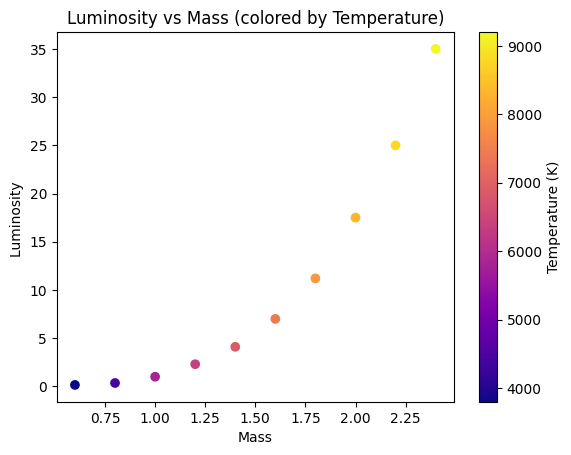

In [83]:
plt.scatter(M, L, c=T, cmap='plasma')
plt.colorbar(label='Temperature (K)')
plt.xlabel('Mass')
plt.ylabel('Luminosity ')
plt.title('Luminosity vs Mass (colored by Temperature)')
plt.show()


2.Feature engineering:

In [84]:
X = np.column_stack([M, T, M**2, M*T ])

print(X.shape)
print(X)

(10, 4)
[[6.000e-01 3.800e+03 3.600e-01 2.280e+03]
 [8.000e-01 4.400e+03 6.400e-01 3.520e+03]
 [1.000e+00 5.800e+03 1.000e+00 5.800e+03]
 [1.200e+00 6.400e+03 1.440e+00 7.680e+03]
 [1.400e+00 6.900e+03 1.960e+00 9.660e+03]
 [1.600e+00 7.400e+03 2.560e+00 1.184e+04]
 [1.800e+00 7.900e+03 3.240e+00 1.422e+04]
 [2.000e+00 8.300e+03 4.000e+00 1.660e+04]
 [2.200e+00 8.800e+03 4.840e+00 1.936e+04]
 [2.400e+00 9.200e+03 5.760e+00 2.208e+04]]


3.Loss and gradients (vectorized):

In [85]:
def predict(X, w, b):
    return X @ w + b

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

In [86]:
def gradients(X, y, w, b):
    n = len(y)
    y_hat = predict(X, w, b)
    
    dw = (-2/n) * (X.T @ (y - y_hat))
    db = (-2/n) * np.sum(y - y_hat)
    
    return dw, db

In [87]:
# Prueba

w = np.zeros(X.shape[1])
b = 0.0

dw, db = gradients(X, L, w, b)

print(dw.shape) 
print(type(db))  


(4,)
<class 'numpy.float64'>


4.Gradient descent + convergence:

In [88]:
def gradient_descent(X, y, lr=1e-12, epochs=2000):
    w = np.zeros(X.shape[1])
    b = 0.0
    losses = []

    for _ in range(epochs):
        y_hat = X @ w + b
        loss = mse(y, y_hat)
        losses.append(loss)

        dw, db = gradients(X, y, w, b)

        w -= lr * dw
        b -= lr * db

    return w, b, losses


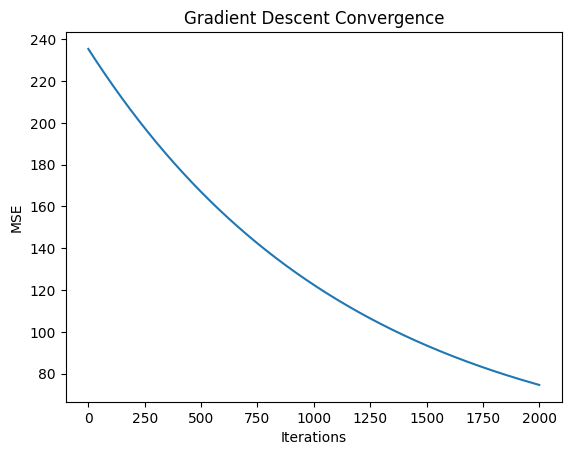

In [89]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Gradient Descent Convergence")
plt.show()

Mediante el uso de gradiante descendente se estreno el modelo y ademas se registra el valor de la perdida en cada iteracion.

En el grafico podemos observar una disminucion continua del error, lo que indica una correcta convergencia del algoritmo.

5.Feature selection experiment (mandatory):

In [90]:
# Definicion de matricez

X_M1 = np.column_stack([M, T])
X_M2 = np.column_stack([M, T, M**2])
X_M3 = np.column_stack([M, T, M**2, M*T])


In [91]:
# Comparacion de modelos

models = {
    "M1": X_M1,
    "M2": X_M2,
    "M3": X_M3
}

results = {}

for name, X_i in models.items():
    w_i, b_i, losses_i = gradient_descent(X_i, L)
    results[name] = (w_i, b_i, losses_i[-1])

    print(f"{name}")
    print("w =", w_i)
    print("b =", b_i)
    print("Final loss =", losses_i[-1])
    print()

M1
w = [7.86593718e-08 3.18231031e-04]
b = 3.690967373431193e-08
Final loss = 184.60968858044959

M2
w = [7.86593702e-08 3.18231024e-04 1.70225488e-07]
b = 3.690967289742962e-08
Final loss = 184.6096761416274

M3
w = [5.66446960e-08 2.23948210e-04 1.27016304e-07 5.03021468e-04]
b = 2.4926076036579937e-08
Final loss = 74.61878062740902



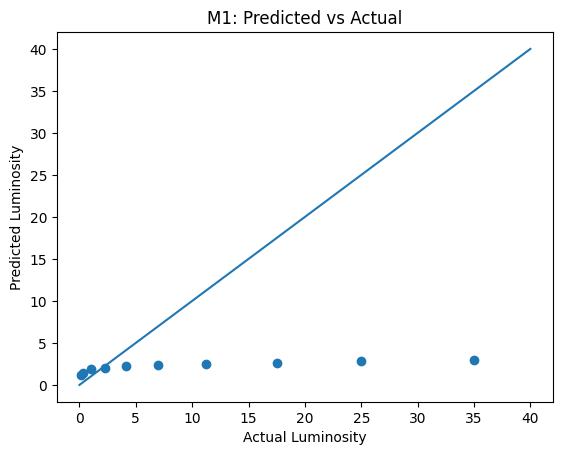

In [92]:
y_hat = X_M1 @ results["M1"][0] + results["M1"][1]

plt.scatter(L, y_hat)
plt.plot([0, 40], [0, 40])
plt.xlabel("Actual Luminosity")
plt.ylabel("Predicted Luminosity")
plt.title("M1: Predicted vs Actual")
plt.show()

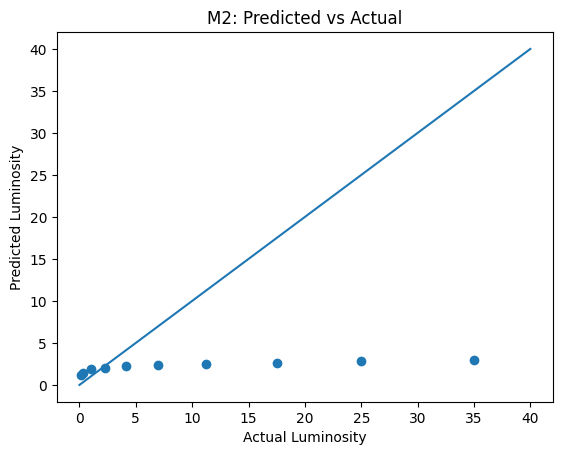

In [93]:
y_hat = X_M2 @ results["M2"][0] + results["M2"][1]

plt.scatter(L, y_hat)
plt.plot([0, 40], [0, 40])
plt.xlabel("Actual Luminosity")
plt.ylabel("Predicted Luminosity")
plt.title("M2: Predicted vs Actual")
plt.show()

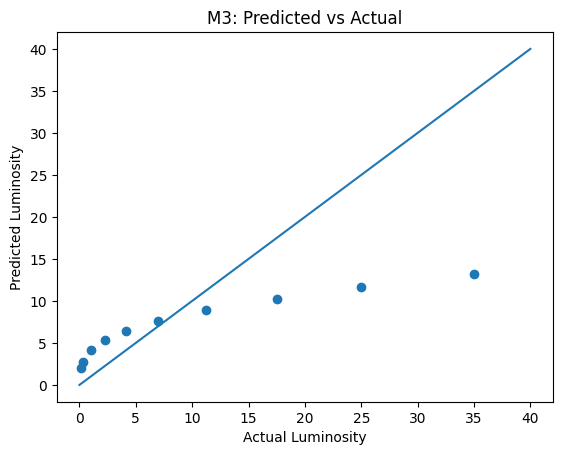

In [94]:
y_hat = X_M3 @ results["M3"][0] + results["M3"][1]

plt.scatter(L, y_hat)
plt.plot([0, 40], [0, 40])
plt.xlabel("Actual Luminosity")
plt.ylabel("Predicted Luminosity")
plt.title("M3: Predicted vs Actual")
plt.show()

Al hacer la comparacion de los 3 modelos, tenemos que el modelo M1 obtuvo un mayor error debido a la consideracion de solo terminos lineales. El modelo M2 obtuvo una reduccion de la perdida gracias a la implmentacion de M^2. Finalmente se tiene que el modelo M3 obtuvo el mejor resultado gracias a la implementacion de lo agregado en M2 y adicionalmente implementa una interaccion entre masa y temperatura.

6.Cost vs interaction (mandatory):

In [95]:
w, b, losses = gradient_descent(X_M3, L)


In [96]:
w_mt_values = np.linspace(w[3] - 1e-6, w[3] + 1e-6, 100)
costs = []

for val in w_mt_values:
    w_test = w.copy()
    w_test[3] = val  

    y_hat = X_M3 @ w_test + b
    costs.append(mse(L, y_hat))


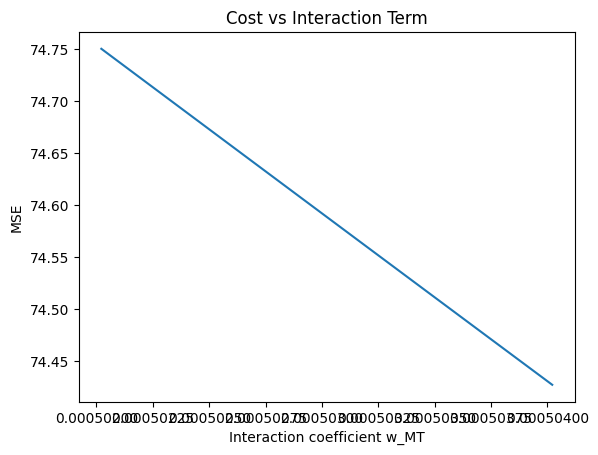

In [97]:
plt.plot(w_mt_values, costs)
plt.xlabel("Interaction coefficient w_MT")
plt.ylabel("MSE")
plt.title("Cost vs Interaction Term")
plt.show()


El grafico nos dice que al aumentar el coeficiente de interacción, el error se reduce, lo que indica que el termino M * T mejora el desempeño del modelo. No se observa un mínimo claro, lo que sugiere que el rango probado no es suficiente.

7.Inference demo (mandatory):

In [98]:
M_new = 1.3
T_new = 6600

X_new = np.array([M_new, T_new, M_new**2, M_new * T_new])


In [99]:
L_pred = X_new @ w + b

print("Luminosidad predicha:", L_pred)


Luminosidad predicha: 5.793982693337596


Basandose en el ejemplo propuesto en el enunciado para este trabajo, la luminosidad predicha es razonable, ya que esta se encuentra entre los valores observados para las masas cercanas en el conjunto de datos y ademas esta sigue la tendencia creciente de la luminosidad con respecto a la masa.